
# Backtesting Fixed Income Strategies: Evaluating Performance with Historical Data

## Overview
Backtesting involves using historical data to test the performance of trading strategies. In fixed income, this allows investors to assess the effectiveness of strategies based on past market conditions and improve strategy robustness.

In this notebook, we will:

- **Understand Backtesting in Fixed Income**: Learn the basics of backtesting and its applications in fixed income markets.
- **Use Real Data for Backtesting**: Download historical data for bond ETFs to test a simple fixed income strategy.
- **Example Strategy Backtest**: Implement a hypothetical carry trade strategy and evaluate its performance.

Backtesting is a valuable tool for developing and refining fixed income strategies, enabling investors to make data-driven decisions.



## 1. Basics of Backtesting in Fixed Income

Backtesting helps evaluate the performance of trading strategies by simulating trades on historical data. Key considerations for backtesting fixed income strategies include:

- **Interest Rate Movements**: Understanding how bond prices react to changing rates.
- **Credit Spreads**: Assessing how credit spread changes impact different bonds.
- **Yield Curve**: Evaluating the effect of yield curve shifts on bond portfolios.

By testing strategies on historical data, investors can gauge how strategies might perform under similar market conditions.



## 2. Downloading Data for Backtesting

We’ll use `yfinance` to download historical data for a corporate bond ETF (e.g., LQD) and a Treasury bond ETF (e.g., GOVT). This data will allow us to simulate a simple carry trade strategy in the fixed income market.

### Download and Prepare Data


In [1]:

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download historical data for corporate bond ETF (LQD) and Treasury bond ETF (GOVT)
corporate_etf = yf.download("LQD", start="2010-01-01", end="2023-01-01")
treasury_etf = yf.download("GOVT", start="2010-01-01", end="2023-01-01")

# Calculate daily returns as proxies for yield changes
corporate_yield = corporate_etf['Adj Close'].pct_change().dropna()
treasury_yield = treasury_etf['Adj Close'].pct_change().dropna()

# Align data to ensure consistent dates
aligned_yields = pd.concat([corporate_yield, treasury_yield], axis=1, join="inner")
aligned_yields.columns = ["Corporate Yield", "Treasury Yield"]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



## 3. Example Backtesting: Carry Trade Strategy

A simple carry trade strategy involves borrowing at a lower interest rate (represented by Treasury bond yields) and investing in higher-yield assets (represented by corporate bond yields). 

In this example, we’ll simulate the carry trade by going long on corporate bonds (LQD) and short on Treasuries (GOVT) whenever the yield spread exceeds a certain threshold.


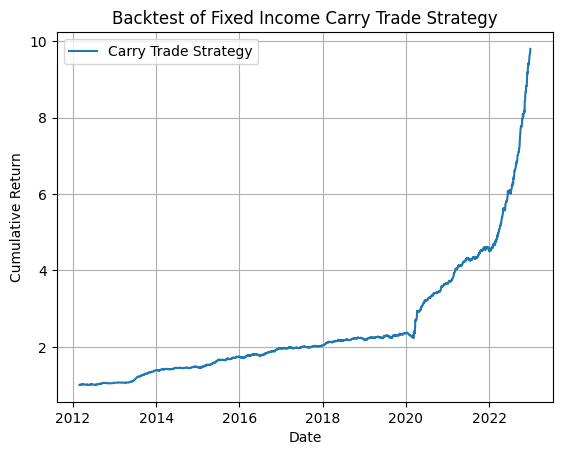

In [2]:

# Define parameters for the carry trade strategy
threshold = 0.002  # Yield spread threshold for trade execution

# Calculate yield spread
yield_spread = aligned_yields["Corporate Yield"] - aligned_yields["Treasury Yield"]

# Define positions based on yield spread
aligned_yields["Position"] = yield_spread.apply(lambda x: 1 if x > threshold else 0)

# Calculate daily returns from the strategy
aligned_yields["Strategy Return"] = aligned_yields["Position"] * aligned_yields["Corporate Yield"] - (1 - aligned_yields["Position"]) * aligned_yields["Treasury Yield"]

# Plot cumulative returns of the strategy
aligned_yields["Cumulative Return"] = (1 + aligned_yields["Strategy Return"]).cumprod()
plt.plot(aligned_yields["Cumulative Return"], label="Carry Trade Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Backtest of Fixed Income Carry Trade Strategy")
plt.legend()
plt.grid(True)
plt.show()



## Summary

In this notebook, we covered:

- **Basics of Backtesting**: Understanding the role of backtesting in evaluating fixed income strategies.
- **Real Data Analysis**: Using historical data for corporate and Treasury bond ETFs to simulate a carry trade.
- **Strategy Backtest**: Evaluating a hypothetical carry trade strategy and plotting its cumulative return.

Backtesting provides insights into strategy performance, enabling investors to refine their approach and make data-driven decisions in fixed income markets.
